In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")
sns.set(font_scale=2)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

/Users/abbieschindler/opt/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### RFID data

#### Get paths for files to process

In [2]:
#create list of dir paths
RFID_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/RFID'
    
RFID_file_names = os.listdir(RFID_path)

RFID_data_dir_paths = []

for file in RFID_file_names:
    int_path = RFID_path + '/' + file
    RFID_data_dir_paths.append(int_path)
    
RFID_data_dir_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/RFID/Idspyder-22.11.11.csv']

#### Clean df and fix datetime

In [3]:
path = RFID_data_dir_paths[0]

data_RFID_int = pd.read_csv(path, sep=';', encoding='utf-16')

data_RFID_int = pd.DataFrame(data = data_RFID_int)
print(data_RFID_int.shape)

data_RFID_int.head(50)

(44960, 14)


,DateTime,IdRFID,IdLabel,unitLabel,eventDuration,sense1duration,sense1Events,senseRFIDrecords,outFuncLabel,outLabel,SystemMsg,MsgValue1,MsgValue2,MsgValue3
0,#ID-Device,Spyder1.01,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#ID-Device,Spyder1.02,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#ID-Device,Spyder1.03,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#ID-Device,Spyder1.04,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#ID-Device,Spyder1.05,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,#ID-Device,Spyder1.06,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,#ID-Device,Spyder1.07,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,#ID-Device,Spyder1.08,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,#ID-Device,Spyder1.09,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,#ID-Device,Spyder1.10,0,0,0.0,SAM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
row_drop = 25

data_RFID = pd.DataFrame()

for path in RFID_data_dir_paths[0:]:
    print(path)

    if path.split('/')[-1] == '.DS_Store':
        continue
    
    #data_RFID_int['file'] = path.split('/')[-1]
    
    #create data table
    data_RFID_int = pd.read_csv(path, sep=';', encoding='utf-16')
    data_RFID_int = pd.DataFrame(data = data_RFID_int)
    data_RFID_int = data_RFID_int.iloc[row_drop: , :]
    print(data_RFID_int.shape)
    
    #add file name
    data_RFID_int['RFID_file'] = path.split('/')[-1]
                                            
    #drop rows with no event duration
    data_RFID_int = data_RFID_int[~data_RFID_int['eventDuration'].isna()]
    print(data_RFID_int.shape)
    data_RFID_int = data_RFID_int[~data_RFID_int['DateTime'].isna()]
    print(data_RFID_int.shape)

    #convert from ms to sec
    data_RFID_int['eventDuration'] = data_RFID_int['eventDuration']/1000
    #clean up and create datetime columns
    data_RFID_int['start_datetime'] = pd.to_datetime(data_RFID_int['DateTime'], unit='d')
    #can't figure out datetime format so hard code for now
    data_RFID_int['RFID_datetime_start'] = [x.replace(year = 2022) - dt.timedelta(days = 1) for x in data_RFID_int['start_datetime']] 
    data_RFID_int['RFID_date'] = data_RFID_int['RFID_datetime_start'].dt.date 
    data_RFID_int['RFID_day'] = data_RFID_int['RFID_datetime_start'].dt.day 
    data_RFID_int['RFID_time_start'] = [x.split(' ')[1] for x in data_RFID_int['RFID_datetime_start'].dt.strftime("%Y-%m-%d %H:%M:%S")]
    data_RFID_int['RFID_hour'] = data_RFID_int['RFID_datetime_start'].dt.hour
    data_RFID_int['RFID_min'] = data_RFID_int['RFID_datetime_start'].dt.minute
    data_RFID_int['RFID_second'] = data_RFID_int['RFID_datetime_start'].dt.second

    if data_RFID.empty:
        data_RFID = data_RFID_int
    else:
        data_RFID = pd.concat([data_RFID, data_RFID_int], axis=0)
        
    print(data_RFID.shape,'\n')

#clean columns
data_RFID = data_RFID[['RFID_file', 'IdRFID', 'unitLabel', 'eventDuration',
       'RFID_datetime_start', 'RFID_date',
       'RFID_day', 'RFID_time_start', 'RFID_hour', 'RFID_min', 'RFID_second']]

print(data_RFID.shape,'\n')

data_RFID.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/RFID/Idspyder-22.11.11.csv
(44935, 14)
(44933, 15)
(44933, 15)
(44933, 23) 

(44933, 11) 



,RFID_file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second
25,Idspyder-22.11.11.csv,041AC16185,Spyder1.15,0.075,2022-11-11 09:41:56.964969600,2022-11-11,11,09:41:56,9,41,56
26,Idspyder-22.11.11.csv,041AC169A3,Spyder1.16,0.228,2022-11-11 09:41:57.746976000,2022-11-11,11,09:41:57,9,41,57
27,Idspyder-22.11.11.csv,041AC169A3,Spyder1.16,0.075,2022-11-11 09:41:59.190979200,2022-11-11,11,09:41:59,9,41,59
28,Idspyder-22.11.11.csv,041AC1660D,Spyder1.07,0.075,2022-11-11 09:41:59.734003200,2022-11-11,11,09:41:59,9,41,59
29,Idspyder-22.11.11.csv,041AC1660D,Spyder1.06,0.814,2022-11-11 09:41:59.775043200,2022-11-11,11,09:41:59,9,41,59


In [5]:
data_RFID['RFID_day'].value_counts()

12    16689
11    12846
13    10299
14    5099 
Name: RFID_day, dtype: int64

In [6]:
data_RFID['IdRFID'].value_counts()

041AC02DFB    5342
041AC16B8D    4155
041AC1659C    3807
041AC16566    3592
041AC16A21    3248
041AC16626    2975
041AC163E0    2908
041ABFF7BC    2612
041AC035B7    2541
041AC15EEE    2189
041AC1685B    1800
041AC16229    1794
041AC1662C    1620
041AC16024    1595
041AC161AF    1552
041AC165C3    1508
041AC166CF    1407
041AC16282    158 
041A55583F    28  
041AC16B67    27  
041AC16982    19  
041AC16185    12  
041AC169DC    9   
041AC169A3    9   
041AC1610F    8   
041AC16B88    7   
041AC1660D    6   
041AC163A9    5   
Name: IdRFID, dtype: int64

#### Compute endtime 

In [7]:
#compute end time for each eventDuration
def add_duration(a, b):
    newtime = a + dt.timedelta(0, b)

    return newtime

data_RFID['RFID_datetime_end'] = data_RFID.apply(lambda row: add_duration(row['RFID_datetime_start'], row['eventDuration']), axis=1)
data_RFID['RFID_time_end'] = [x.split(' ')[1] for x in data_RFID['RFID_datetime_end'].dt.strftime("%Y-%m-%d %H:%M:%S")]

print(data_RFID.shape)
data_RFID.head()

(44933, 13)


,RFID_file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end
25,Idspyder-22.11.11.csv,041AC16185,Spyder1.15,0.075,2022-11-11 09:41:56.964969600,2022-11-11,11,09:41:56,9,41,56,2022-11-11 09:41:57.039969600,09:41:57
26,Idspyder-22.11.11.csv,041AC169A3,Spyder1.16,0.228,2022-11-11 09:41:57.746976000,2022-11-11,11,09:41:57,9,41,57,2022-11-11 09:41:57.974976000,09:41:57
27,Idspyder-22.11.11.csv,041AC169A3,Spyder1.16,0.075,2022-11-11 09:41:59.190979200,2022-11-11,11,09:41:59,9,41,59,2022-11-11 09:41:59.265979200,09:41:59
28,Idspyder-22.11.11.csv,041AC1660D,Spyder1.07,0.075,2022-11-11 09:41:59.734003200,2022-11-11,11,09:41:59,9,41,59,2022-11-11 09:41:59.809003200,09:41:59
29,Idspyder-22.11.11.csv,041AC1660D,Spyder1.06,0.814,2022-11-11 09:41:59.775043200,2022-11-11,11,09:41:59,9,41,59,2022-11-11 09:42:00.589043200,09:42:00


#### Add day, hour, and min counts

In [8]:
#column of running day count
dat_map = dict(zip(data_RFID['RFID_date'].sort_values().unique(), np.arange(1,len(data_RFID['RFID_date'].unique())+1)))
data_RFID['RFID_day_count'] = data_RFID['RFID_date'].map(dat_map)

#column of running min and second count within each day
data_RFID['RFID_min_count'] = (data_RFID['RFID_hour']*60) + data_RFID['RFID_min'] 
data_RFID['RFID_sec_count'] = (data_RFID['RFID_min_count']*60) + data_RFID['RFID_second'] 

#column of running hour and minute count across all days
data_RFID['RFID_hour_count_running'] = (data_RFID['RFID_day_count']*24) + data_RFID['RFID_hour'] - 24
data_RFID['RFID_min_count_running'] = (data_RFID['RFID_hour_count_running']*60) + data_RFID['RFID_min'] 
data_RFID['RFID_sec_count_running'] = (data_RFID['RFID_min_count_running']*60) + data_RFID['RFID_second'] - 60

print(data_RFID.shape)
data_RFID.head()

(44933, 19)


,RFID_file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running
25,Idspyder-22.11.11.csv,041AC16185,Spyder1.15,0.075,2022-11-11 09:41:56.964969600,2022-11-11,11,09:41:56,9,41,56,2022-11-11 09:41:57.039969600,09:41:57,1,581,34916,9,581,34856
26,Idspyder-22.11.11.csv,041AC169A3,Spyder1.16,0.228,2022-11-11 09:41:57.746976000,2022-11-11,11,09:41:57,9,41,57,2022-11-11 09:41:57.974976000,09:41:57,1,581,34917,9,581,34857
27,Idspyder-22.11.11.csv,041AC169A3,Spyder1.16,0.075,2022-11-11 09:41:59.190979200,2022-11-11,11,09:41:59,9,41,59,2022-11-11 09:41:59.265979200,09:41:59,1,581,34919,9,581,34859
28,Idspyder-22.11.11.csv,041AC1660D,Spyder1.07,0.075,2022-11-11 09:41:59.734003200,2022-11-11,11,09:41:59,9,41,59,2022-11-11 09:41:59.809003200,09:41:59,1,581,34919,9,581,34859
29,Idspyder-22.11.11.csv,041AC1660D,Spyder1.06,0.814,2022-11-11 09:41:59.775043200,2022-11-11,11,09:41:59,9,41,59,2022-11-11 09:42:00.589043200,09:42:00,1,581,34919,9,581,34859


In [9]:
dat_map

{datetime.date(2022, 11, 11): 1,
 datetime.date(2022, 11, 12): 2,
 datetime.date(2022, 11, 13): 3,
 datetime.date(2022, 11, 14): 4}

#### Light/dark mapping

In [10]:
def assign_ld(time):
    if (time >= 6) & (time < 18):
        return 'light'
    if (time >= 0) & (time < 6):
        return 'dark_am'
    if (time >= 18):
        return 'dark_pm'
    
data_RFID['ld_seg'] = data_RFID['RFID_hour'].apply(assign_ld)

print(data_RFID.shape)
data_RFID.head()


(44933, 20)


,RFID_file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,ld_seg
25,Idspyder-22.11.11.csv,041AC16185,Spyder1.15,0.075,2022-11-11 09:41:56.964969600,2022-11-11,11,09:41:56,9,41,56,2022-11-11 09:41:57.039969600,09:41:57,1,581,34916,9,581,34856,light
26,Idspyder-22.11.11.csv,041AC169A3,Spyder1.16,0.228,2022-11-11 09:41:57.746976000,2022-11-11,11,09:41:57,9,41,57,2022-11-11 09:41:57.974976000,09:41:57,1,581,34917,9,581,34857,light
27,Idspyder-22.11.11.csv,041AC169A3,Spyder1.16,0.075,2022-11-11 09:41:59.190979200,2022-11-11,11,09:41:59,9,41,59,2022-11-11 09:41:59.265979200,09:41:59,1,581,34919,9,581,34859,light
28,Idspyder-22.11.11.csv,041AC1660D,Spyder1.07,0.075,2022-11-11 09:41:59.734003200,2022-11-11,11,09:41:59,9,41,59,2022-11-11 09:41:59.809003200,09:41:59,1,581,34919,9,581,34859,light
29,Idspyder-22.11.11.csv,041AC1660D,Spyder1.06,0.814,2022-11-11 09:41:59.775043200,2022-11-11,11,09:41:59,9,41,59,2022-11-11 09:42:00.589043200,09:42:00,1,581,34919,9,581,34859,light


In [11]:
ld_mapping_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/meta/ld_mapping.xlsx'

ld_mapping = pd.read_excel(ld_mapping_path)
ld_mapping = pd.DataFrame(data = ld_mapping)
print(ld_mapping.shape)
ld_mapping.head()

(57, 4)


,day,ld_seg,ld_cycle,ld_day
0,1,light,light,1
1,1,dark_pm,dark,1
2,2,dark_am,dark,1
3,2,light,light,2
4,2,dark_pm,dark,2


In [12]:
data_RFID = data_RFID.merge(ld_mapping, right_on=['day', 'ld_seg'], left_on=['RFID_day_count', 'ld_seg'])
print(data_RFID.shape)
data_RFID.head()

(44933, 23)


,RFID_file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,ld_seg,day,ld_cycle,ld_day
0,Idspyder-22.11.11.csv,041AC16185,Spyder1.15,0.075,2022-11-11 09:41:56.964969600,2022-11-11,11,09:41:56,9,41,56,2022-11-11 09:41:57.039969600,09:41:57,1,581,34916,9,581,34856,light,1,light,1
1,Idspyder-22.11.11.csv,041AC169A3,Spyder1.16,0.228,2022-11-11 09:41:57.746976000,2022-11-11,11,09:41:57,9,41,57,2022-11-11 09:41:57.974976000,09:41:57,1,581,34917,9,581,34857,light,1,light,1
2,Idspyder-22.11.11.csv,041AC169A3,Spyder1.16,0.075,2022-11-11 09:41:59.190979200,2022-11-11,11,09:41:59,9,41,59,2022-11-11 09:41:59.265979200,09:41:59,1,581,34919,9,581,34859,light,1,light,1
3,Idspyder-22.11.11.csv,041AC1660D,Spyder1.07,0.075,2022-11-11 09:41:59.734003200,2022-11-11,11,09:41:59,9,41,59,2022-11-11 09:41:59.809003200,09:41:59,1,581,34919,9,581,34859,light,1,light,1
4,Idspyder-22.11.11.csv,041AC1660D,Spyder1.06,0.814,2022-11-11 09:41:59.775043200,2022-11-11,11,09:41:59,9,41,59,2022-11-11 09:42:00.589043200,09:42:00,1,581,34919,9,581,34859,light,1,light,1


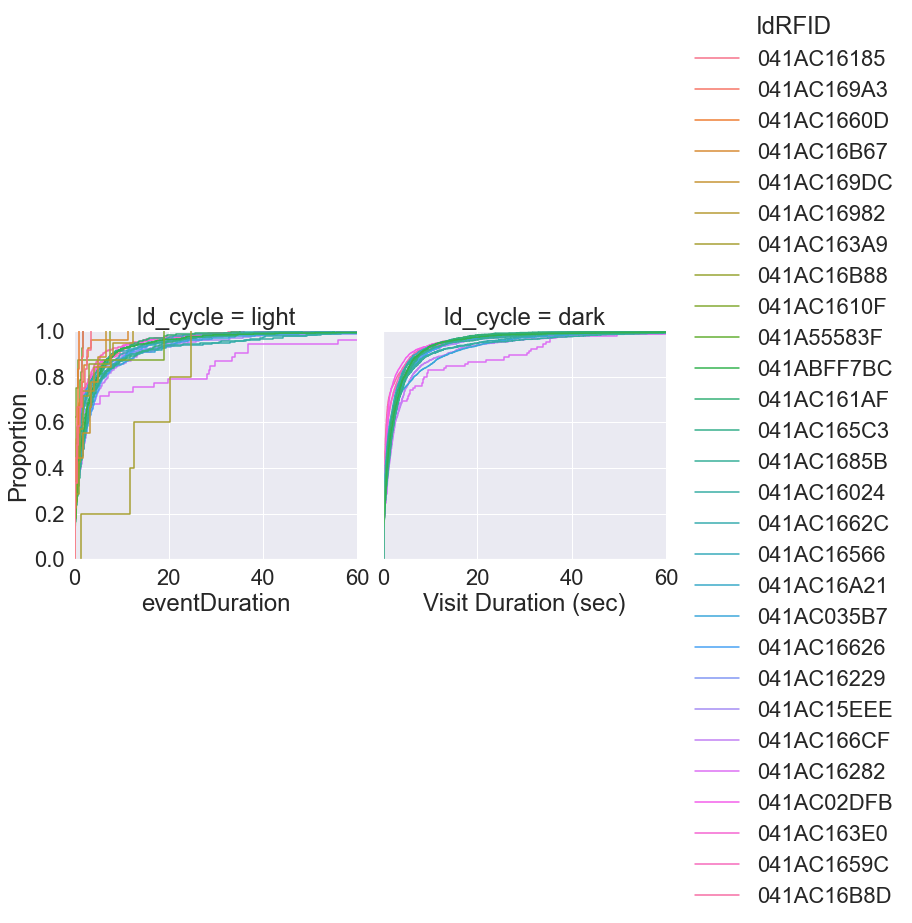

In [13]:
sns.displot(data=data_RFID, x="eventDuration", kind="ecdf", hue='IdRFID', col='ld_cycle')
plt.xlabel('Visit Duration (sec)')
plt.xlim(0, 60)
plt.show()

In [14]:
data_RFID.groupby(['unitLabel'])['IdRFID'].value_counts()

unitLabel   IdRFID    
Spyder1.01  041ABFF7BC    979 
            041AC1685B    614 
            041AC161AF    565 
            041AC165C3    460 
            041A55583F    1   
Spyder1.02  041ABFF7BC    580 
            041AC1685B    569 
            041AC161AF    260 
            041AC165C3    215 
            041A55583F    2   
Spyder1.03  041ABFF7BC    488 
            041AC165C3    306 
            041AC161AF    302 
            041AC1685B    274 
            041A55583F    1   
Spyder1.04  041ABFF7BC    564 
            041AC165C3    526 
            041AC161AF    424 
            041AC1685B    342 
            041A55583F    1   
Spyder1.05  041AC16566    1163
            041AC16A21    881 
            041AC16024    362 
            041AC1662C    228 
            041A55583F    1   
            041AC1660D    1   
Spyder1.06  041AC16566    784 
            041AC16A21    668 
            041AC16024    282 
            041AC1662C    216 
            041AC1660D    2   
            041A

#### Map unitLabel and bottle contents

In [15]:
RFID_bottle_assignment_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/meta/bottle_assignment_RFID.xlsx'

RFID_bottle_assignment = pd.read_excel(RFID_bottle_assignment_path)
RFID_bottle_assignment = pd.DataFrame(data = RFID_bottle_assignment)
print(RFID_bottle_assignment.shape)
RFID_bottle_assignment.tail()

(1, 27)


,cohort,RFID_file,VDM_file,Spyder1.01,Spyder1.02,Spyder1.03,Spyder1.04,Spyder1.05,Spyder1.06,Spyder1.07,Spyder1.08,Spyder1.09,Spyder1.10,Spyder1.11,Spyder1.12,Spyder1.13,Spyder1.14,Spyder1.15,Spyder1.16,Spyder1.17,Spyder1.18,Spyder1.19,Spyder1.20,Spyder1.21,Spyder1.22,Spyder1.23,Spyder1.24
0,etoh,Idspyder-22.11.11.csv,w_e05_e10_e2.5_MPc1_221111.csv,water,etoh_05,etoh_10,etoh_02,water,etoh_05,etoh_10,etoh_02,water,etoh_05,etoh_10,etoh_02,water,etoh_05,etoh_10,etoh_02,water,etoh_05,etoh_10,etoh_02,water,etoh_05,etoh_10,etoh_02


In [16]:
file=data_RFID['RFID_file'].unique()[0]
RFID_bottle_map = RFID_bottle_assignment[RFID_bottle_assignment['RFID_file']==file].reset_index().loc[0,'Spyder1.01':'Spyder1.24'].to_dict()

data_RFID['unitLabel_drink'] = data_RFID['unitLabel'].map(RFID_bottle_map)
print(data_RFID.shape)

data_RFID.head()

(44933, 24)


,RFID_file,IdRFID,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,ld_seg,day,ld_cycle,ld_day,unitLabel_drink
0,Idspyder-22.11.11.csv,041AC16185,Spyder1.15,0.075,2022-11-11 09:41:56.964969600,2022-11-11,11,09:41:56,9,41,56,2022-11-11 09:41:57.039969600,09:41:57,1,581,34916,9,581,34856,light,1,light,1,etoh_10
1,Idspyder-22.11.11.csv,041AC169A3,Spyder1.16,0.228,2022-11-11 09:41:57.746976000,2022-11-11,11,09:41:57,9,41,57,2022-11-11 09:41:57.974976000,09:41:57,1,581,34917,9,581,34857,light,1,light,1,etoh_02
2,Idspyder-22.11.11.csv,041AC169A3,Spyder1.16,0.075,2022-11-11 09:41:59.190979200,2022-11-11,11,09:41:59,9,41,59,2022-11-11 09:41:59.265979200,09:41:59,1,581,34919,9,581,34859,light,1,light,1,etoh_02
3,Idspyder-22.11.11.csv,041AC1660D,Spyder1.07,0.075,2022-11-11 09:41:59.734003200,2022-11-11,11,09:41:59,9,41,59,2022-11-11 09:41:59.809003200,09:41:59,1,581,34919,9,581,34859,light,1,light,1,etoh_10
4,Idspyder-22.11.11.csv,041AC1660D,Spyder1.06,0.814,2022-11-11 09:41:59.775043200,2022-11-11,11,09:41:59,9,41,59,2022-11-11 09:42:00.589043200,09:42:00,1,581,34919,9,581,34859,light,1,light,1,etoh_05


In [17]:
data_RFID.groupby('unitLabel_drink')['unitLabel'].value_counts()

unitLabel_drink  unitLabel 
etoh_02          Spyder1.24    3657
                 Spyder1.08    2654
                 Spyder1.04    1857
                 Spyder1.20    1388
                 Spyder1.16    954 
                 Spyder1.12    541 
etoh_05          Spyder1.22    3049
                 Spyder1.06    1953
                 Spyder1.02    1626
                 Spyder1.18    1208
                 Spyder1.10    657 
                 Spyder1.14    359 
etoh_10          Spyder1.23    6726
                 Spyder1.07    2814
                 Spyder1.03    1371
                 Spyder1.15    1021
                 Spyder1.19    785 
                 Spyder1.11    644 
water            Spyder1.21    2792
                 Spyder1.05    2636
                 Spyder1.01    2619
                 Spyder1.17    2215
                 Spyder1.09    715 
                 Spyder1.13    692 
Name: unitLabel, dtype: int64

#### Add metadata and clean

In [18]:
meta_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/meta/meta_data.xlsx'
meta_data = pd.read_excel(meta_path)
meta_data = pd.DataFrame(data = meta_data)

data_RFID_final = meta_data.merge(data_RFID.reset_index(), on='IdRFID', sort=False)

print(data_RFID_final.shape)
data_RFID_final.head()

(44803, 39)


,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,weight_pre,weight_post,weight_diff,notes,index,RFID_file,unitLabel,eventDuration,RFID_datetime_start,RFID_date,RFID_day,RFID_time_start,RFID_hour,RFID_min,RFID_second,RFID_datetime_end,RFID_time_end,RFID_day_count,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,ld_seg,day,ld_cycle,ld_day,unitLabel_drink
0,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,NaN,NaN,NaN,130,Idspyder-22.11.11.csv,Spyder1.20,2.290,2022-11-11 18:08:38.854982399,2022-11-11,11,18:08:38,18,8,38,2022-11-11 18:08:41.144982399,18:08:41,1,1088,65318,18,1088,65258,dark_pm,1,dark,1,etoh_02
1,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,NaN,NaN,NaN,133,Idspyder-22.11.11.csv,Spyder1.01,5.366,2022-11-11 18:09:34.690032000,2022-11-11,11,18:09:34,18,9,34,2022-11-11 18:09:40.056032000,18:09:40,1,1089,65374,18,1089,65314,dark_pm,1,dark,1,water
2,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,NaN,NaN,NaN,135,Idspyder-22.11.11.csv,Spyder1.01,5.264,2022-11-11 18:10:32.770012799,2022-11-11,11,18:10:32,18,10,32,2022-11-11 18:10:38.034012799,18:10:38,1,1090,65432,18,1090,65372,dark_pm,1,dark,1,water
3,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,NaN,NaN,NaN,136,Idspyder-22.11.11.csv,Spyder1.01,0.075,2022-11-11 18:10:39.149011200,2022-11-11,11,18:10:39,18,10,39,2022-11-11 18:10:39.224011200,18:10:39,1,1090,65439,18,1090,65379,dark_pm,1,dark,1,water
4,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,NaN,NaN,NaN,138,Idspyder-22.11.11.csv,Spyder1.01,0.075,2022-11-11 18:10:48.400982400,2022-11-11,11,18:10:48,18,10,48,2022-11-11 18:10:48.475982400,18:10:48,1,1090,65448,18,1090,65388,dark_pm,1,dark,1,water


In [20]:
data_RFID_final['IdRFID'].value_counts()

041AC02DFB    5342
041AC16B8D    4155
041AC1659C    3807
041AC16566    3592
041AC16A21    3248
041AC16626    2975
041AC163E0    2908
041ABFF7BC    2612
041AC035B7    2541
041AC15EEE    2189
041AC1685B    1800
041AC16229    1794
041AC1662C    1620
041AC16024    1595
041AC161AF    1552
041AC165C3    1508
041AC166CF    1407
041AC16282    158 
Name: IdRFID, dtype: int64

In [21]:
data_RFID_final = data_RFID_final[['Round', 'Timepoint', 'Cage', 'IdRFID', 'Animal', 'Injury', 'Sex', 'Cage_N', 
                                   'unitLabel_drink', 'unitLabel', 'eventDuration',
                                   'ld_cycle', 'ld_day', 'day', 'RFID_hour', 'RFID_min', 'RFID_second',
                                   'RFID_datetime_start', 'RFID_datetime_end', 'RFID_time_start', 'RFID_time_end', 
                                   'RFID_min_count', 'RFID_sec_count', 
                                   'RFID_hour_count_running', 'RFID_min_count_running', 'RFID_sec_count_running', 
                                   'RFID_file', 'weight_pre', 'weight_post', 'weight_diff', 'notes',]]

print(data_RFID_final.shape)
data_RFID_final.head()

(44803, 31)


,Round,Timepoint,Cage,IdRFID,Animal,Injury,Sex,Cage_N,unitLabel_drink,unitLabel,eventDuration,ld_cycle,ld_day,day,RFID_hour,RFID_min,RFID_second,RFID_datetime_start,RFID_datetime_end,RFID_time_start,RFID_time_end,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,RFID_file,weight_pre,weight_post,weight_diff,notes
0,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,etoh_02,Spyder1.20,2.290,dark,1,1,18,8,38,2022-11-11 18:08:38.854982399,2022-11-11 18:08:41.144982399,18:08:38,18:08:41,1088,65318,18,1088,65258,Idspyder-22.11.11.csv,30.7,NaN,NaN,NaN
1,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,water,Spyder1.01,5.366,dark,1,1,18,9,34,2022-11-11 18:09:34.690032000,2022-11-11 18:09:40.056032000,18:09:34,18:09:40,1089,65374,18,1089,65314,Idspyder-22.11.11.csv,30.7,NaN,NaN,NaN
2,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,water,Spyder1.01,5.264,dark,1,1,18,10,32,2022-11-11 18:10:32.770012799,2022-11-11 18:10:38.034012799,18:10:32,18:10:38,1090,65432,18,1090,65372,Idspyder-22.11.11.csv,30.7,NaN,NaN,NaN
3,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,water,Spyder1.01,0.075,dark,1,1,18,10,39,2022-11-11 18:10:39.149011200,2022-11-11 18:10:39.224011200,18:10:39,18:10:39,1090,65439,18,1090,65379,Idspyder-22.11.11.csv,30.7,NaN,NaN,NaN
4,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,water,Spyder1.01,0.075,dark,1,1,18,10,48,2022-11-11 18:10:48.400982400,2022-11-11 18:10:48.475982400,18:10:48,18:10:48,1090,65448,18,1090,65388,Idspyder-22.11.11.csv,30.7,NaN,NaN,NaN


In [22]:
data_RFID_final.groupby('Injury')['Cage'].value_counts()

Injury  Cage
blast   2       10055
        5       5548 
        4       2975 
        3       2541 
sham    6       16212
        1       7472 
Name: Cage, dtype: int64

In [23]:
data_RFID_final.to_csv('RFID_2211111.csv')

#### Viz

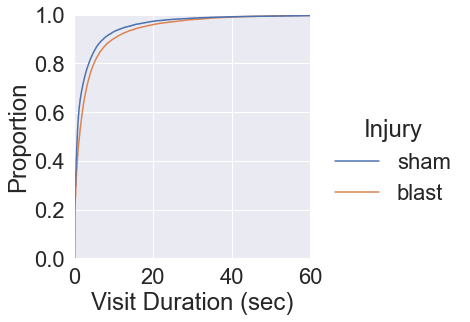

In [24]:
data_int = data_RFID_final
sns.displot(data=data_int, x="eventDuration", kind="ecdf", hue='Injury')
plt.xlabel('Visit Duration (sec)')
plt.xlim(0, 60)
plt.show()

<Figure size 720x360 with 0 Axes>

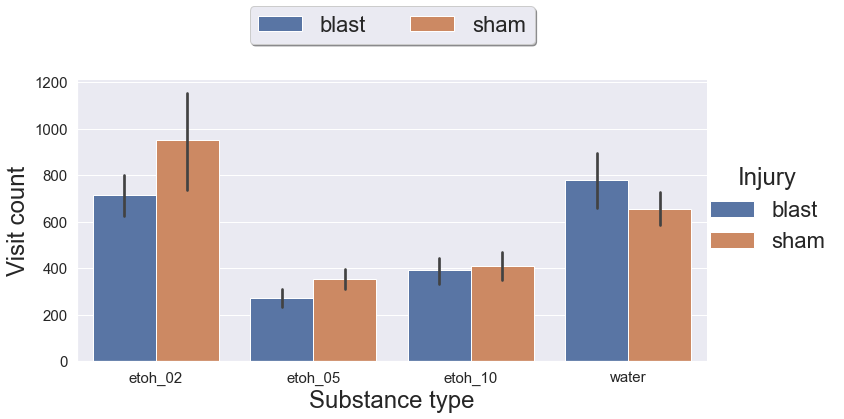

In [25]:
data_int = data_RFID_final

data_int = data_int.groupby(['Injury', 'IdRFID', 'Cage', 'day', 'unitLabel_drink'])['eventDuration'].sum().reset_index(name='count')

plt.figure(figsize=(10,5))
params = {'axes.labelsize': 30,
          'axes.titlesize': 30}
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
sns.catplot(data=data_int, x="unitLabel_drink", y='count', hue="Injury", kind='bar', height=5, aspect=2, ci=68)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), 
          ncol=5, fancybox=True, shadow=True)
plt.xlabel('Substance type')
plt.ylabel('Visit count')
plt.show()

### VDM data

#### Get paths for files to process

In [26]:
#create list of dir paths
VDM_path = '/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/VDM'
    
VDM_file_names = os.listdir(VDM_path)

VDM_data_dir_paths = []

for file in VDM_file_names:
    int_path = VDM_path + '/' + file
    VDM_data_dir_paths.append(int_path)
    
VDM_data_dir_paths

['/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/VDM/w_e05_e10_e2.5_MPc1_221111.csv']

#### Clean df and remove starting meta data

In [27]:
data_VDM_int = pd.read_table(VDM_data_dir_paths[0], sep=';')
data_VDM_int = pd.DataFrame(data = data_VDM_int)
data_VDM_int.head(50)

,Columbus Instruments Device Interface Version 1.5
0,"Started On:,11/11/22 18:07:04"
1,[Experiment Setup Info]
2,"Program Path:,C:\Users\PhenoUser\Desktop\CI Multi-Device Interface"
3,"Data Path:,C:\Users\PhenoUser\Desktop\CI Multi-Device Interface\Data"
4,"Experiment File Name:,C:\Users\PhenoUser\Documents\VDM\final_setup\w_e05_e10_e2.5_MPc1_221111.csv"
5,"Session Interval:,00:00:01"
6,"Experiment Duration:,0"
7,"Staggered Start Enable:,False"
8,[Channel Setup Info]
9,"Cage 1,Cage1"


In [28]:
row_drop = 22
data_VDM = pd.DataFrame()

for path in VDM_data_dir_paths[0:]:
    print(path)
    
    if path.split('/')[-1] == '.DS_Store':
        continue
        
    #create data table
    data_VDM_int = pd.read_table(path, sep=';')
    data_VDM_int = pd.DataFrame(data = data_VDM_int)
    data_VDM_int = data_VDM_int.iloc[row_drop: , :]['Columbus Instruments Device Interface Version 1.5'].str.split(',', expand=True)
    data_VDM_int.columns = data_VDM_int.loc[row_drop].values
    data_VDM_int = data_VDM_int.drop(row_drop)
    
    data_VDM_int['VDM_file'] = path.split('/')[-1]

    if data_VDM.empty:
        data_VDM = data_VDM_int
    else:
        data_VDM = pd.concat([data_VDM, data_VDM_int], axis=0)
        
    print(data_VDM.shape,'\n')

print(data_VDM.shape)
data_VDM.head()

/Users/abbieschindler/Documents/Schindler_Lab/Data/RFID_VDM/MP/VDM/w_e05_e10_e2.5_MPc1_221111.csv
(1232376, 13) 

(1232376, 13)


,Int,Cage,Time,Drinking (ml),Drinking Accum (ml),Drinking (ml),Drinking Accum (ml),Drinking (ml),Drinking Accum (ml),Drinking (ml),Drinking Accum (ml),,VDM_file
23,0,1,11/11/22 18:07:08,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,,w_e05_e10_e2.5_MPc1_221111.csv
24,0,2,11/11/22 18:07:08,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,,w_e05_e10_e2.5_MPc1_221111.csv
25,0,3,11/11/22 18:07:08,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,,w_e05_e10_e2.5_MPc1_221111.csv
26,0,4,11/11/22 18:07:08,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,,w_e05_e10_e2.5_MPc1_221111.csv
27,0,5,11/11/22 18:07:08,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,,w_e05_e10_e2.5_MPc1_221111.csv


In [29]:
data_VDM.columns = ['Int', 'Cage_VDM', 'VDM_Time', 
                    'drink_1', 'drink_1_accum',
                    'drink_2', 'drink_2_accum',
                    'drink_3', 'drink_3_accum',
                    'drink_4', 'drink_4_accum',
                    'blank', 'VDM_file']

data_VDM = data_VDM[['VDM_file', 'Cage_VDM', 'VDM_Time', 
                    'drink_1', 
                    'drink_2', 
                    'drink_3', 
                    'drink_4', 
                    ]]

data_VDM.tail()

,VDM_file,Cage_VDM,VDM_Time,drink_1,drink_2,drink_3,drink_4
1232394,w_e05_e10_e2.5_MPc1_221111.csv,4,11/14/22 14:20:26,0.000,0.000,0.000,0.000
1232395,w_e05_e10_e2.5_MPc1_221111.csv,5,11/14/22 14:20:26,0.000,0.000,0.000,0.000
1232396,w_e05_e10_e2.5_MPc1_221111.csv,6,11/14/22 14:20:26,0.000,0.000,0.000,0.000
1232397,w_e05_e10_e2.5_MPc1_221111.csv,7,11/14/22 14:20:26,0.000,0.000,0.000,0.000
1232398,w_e05_e10_e2.5_MPc1_221111.csv,8,11/14/22 14:20:26,0.000,0.000,0.000,0.000


#### Make into tidy df

In [30]:
#melt dataframe (new column of parameters)

meta_params = ['VDM_file', 'Cage_VDM', 'VDM_Time']
intake_params = ['drink_1', 'drink_2', 'drink_3', 'drink_4']

data_VDM_tidy = pd.melt(data_VDM, id_vars=meta_params, value_vars=intake_params)

data_VDM_tidy = data_VDM_tidy.replace({'':0.000})

data_VDM_tidy['value'] = data_VDM_tidy['value'].astype('float')

print(data_VDM_tidy.shape)
data_VDM_tidy.head()

(4929504, 5)


,VDM_file,Cage_VDM,VDM_Time,variable,value
0,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 18:07:08,drink_1,0.0
1,w_e05_e10_e2.5_MPc1_221111.csv,2,11/11/22 18:07:08,drink_1,0.0
2,w_e05_e10_e2.5_MPc1_221111.csv,3,11/11/22 18:07:08,drink_1,0.0
3,w_e05_e10_e2.5_MPc1_221111.csv,4,11/11/22 18:07:08,drink_1,0.0
4,w_e05_e10_e2.5_MPc1_221111.csv,5,11/11/22 18:07:08,drink_1,0.0


In [31]:
data_VDM_tidy['value'].unique()

array([0.   , 0.021, 0.084, 0.042, 0.105, 0.126, 0.063, 0.168, 0.147,
       0.189])

#### Drop times with no intake data

In [32]:
data_VDM_tidy_intake = data_VDM_tidy[data_VDM_tidy['value'] > 0.000]
print(data_VDM_tidy_intake.shape)
data_VDM_tidy_intake.head()

(5236, 5)


,VDM_file,Cage_VDM,VDM_Time,variable,value
33498,w_e05_e10_e2.5_MPc1_221111.csv,3,11/11/22 19:58:14,drink_1,0.021
33538,w_e05_e10_e2.5_MPc1_221111.csv,3,11/11/22 19:58:22,drink_1,0.021
36421,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 20:07:55,drink_1,0.021
36453,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 20:08:01,drink_1,0.021
36477,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 20:08:06,drink_1,0.021


#### Clean up datetime

In [33]:
#clean up and create datetime columns
data_VDM_tidy_intake['VDM_datetime'] = pd.to_datetime(data_VDM_tidy_intake['VDM_Time'])
data_VDM_tidy_intake['VDM_timestamp'] = [x.timestamp() for x in data_VDM_tidy_intake['VDM_datetime']]

data_VDM_tidy_intake['VDM_date'] = data_VDM_tidy_intake['VDM_datetime'].dt.date
data_VDM_tidy_intake['VDM_day'] = data_VDM_tidy_intake['VDM_datetime'].dt.day
data_VDM_tidy_intake['VDM_time'] = data_VDM_tidy_intake['VDM_datetime'].dt.strftime("%H:%M:%S")
data_VDM_tidy_intake['VDM_hour'] = data_VDM_tidy_intake['VDM_datetime'].dt.hour
data_VDM_tidy_intake['VDM_min'] = data_VDM_tidy_intake['VDM_datetime'].dt.minute
data_VDM_tidy_intake['VDM_second'] = data_VDM_tidy_intake['VDM_datetime'].dt.second

print(data_VDM_tidy_intake.shape)
data_VDM_tidy_intake.head()

(5236, 13)


,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second
33498,w_e05_e10_e2.5_MPc1_221111.csv,3,11/11/22 19:58:14,drink_1,0.021,2022-11-11 19:58:14,1.668197e+09,2022-11-11,11,19:58:14,19,58,14
33538,w_e05_e10_e2.5_MPc1_221111.csv,3,11/11/22 19:58:22,drink_1,0.021,2022-11-11 19:58:22,1.668197e+09,2022-11-11,11,19:58:22,19,58,22
36421,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 20:07:55,drink_1,0.021,2022-11-11 20:07:55,1.668197e+09,2022-11-11,11,20:07:55,20,7,55
36453,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 20:08:01,drink_1,0.021,2022-11-11 20:08:01,1.668197e+09,2022-11-11,11,20:08:01,20,8,1
36477,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 20:08:06,drink_1,0.021,2022-11-11 20:08:06,1.668197e+09,2022-11-11,11,20:08:06,20,8,6


In [34]:
data_VDM_tidy_intake['VDM_day'].value_counts()

12    2150
13    1863
14    856 
11    367 
Name: VDM_day, dtype: int64

#### Light/dark mapping

In [35]:
def assign_ld(time):
    if (time >= 6) & (time < 18):
        return 'light'
    if (time >= 0) & (time < 6):
        return 'dark_am'
    if (time >= 18):
        return 'dark_pm'
    
data_VDM_tidy_intake['ld_seg'] = data_VDM_tidy_intake['VDM_hour'].apply(assign_ld)

data_VDM_tidy_intake.head()

,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg
33498,w_e05_e10_e2.5_MPc1_221111.csv,3,11/11/22 19:58:14,drink_1,0.021,2022-11-11 19:58:14,1.668197e+09,2022-11-11,11,19:58:14,19,58,14,dark_pm
33538,w_e05_e10_e2.5_MPc1_221111.csv,3,11/11/22 19:58:22,drink_1,0.021,2022-11-11 19:58:22,1.668197e+09,2022-11-11,11,19:58:22,19,58,22,dark_pm
36421,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 20:07:55,drink_1,0.021,2022-11-11 20:07:55,1.668197e+09,2022-11-11,11,20:07:55,20,7,55,dark_pm
36453,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 20:08:01,drink_1,0.021,2022-11-11 20:08:01,1.668197e+09,2022-11-11,11,20:08:01,20,8,1,dark_pm
36477,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 20:08:06,drink_1,0.021,2022-11-11 20:08:06,1.668197e+09,2022-11-11,11,20:08:06,20,8,6,dark_pm


#### Map bottle contents

In [38]:
contents_map = {'drink_1':'water',
                'drink_2':'etoh_05',
                'drink_3':'etoh_10',
                'drink_4':'etoh_02',
               }

data_VDM_tidy_intake['VDM_drink'] = data_VDM_tidy_intake['variable'].map(contents_map)

data_VDM_tidy_intake.head()

,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink
33498,w_e05_e10_e2.5_MPc1_221111.csv,3,11/11/22 19:58:14,drink_1,0.021,2022-11-11 19:58:14,1.668197e+09,2022-11-11,11,19:58:14,19,58,14,dark_pm,water
33538,w_e05_e10_e2.5_MPc1_221111.csv,3,11/11/22 19:58:22,drink_1,0.021,2022-11-11 19:58:22,1.668197e+09,2022-11-11,11,19:58:22,19,58,22,dark_pm,water
36421,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 20:07:55,drink_1,0.021,2022-11-11 20:07:55,1.668197e+09,2022-11-11,11,20:07:55,20,7,55,dark_pm,water
36453,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 20:08:01,drink_1,0.021,2022-11-11 20:08:01,1.668197e+09,2022-11-11,11,20:08:01,20,8,1,dark_pm,water
36477,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 20:08:06,drink_1,0.021,2022-11-11 20:08:06,1.668197e+09,2022-11-11,11,20:08:06,20,8,6,dark_pm,water


#### Viz

No handles with labels found to put in legend.


<Figure size 720x360 with 0 Axes>

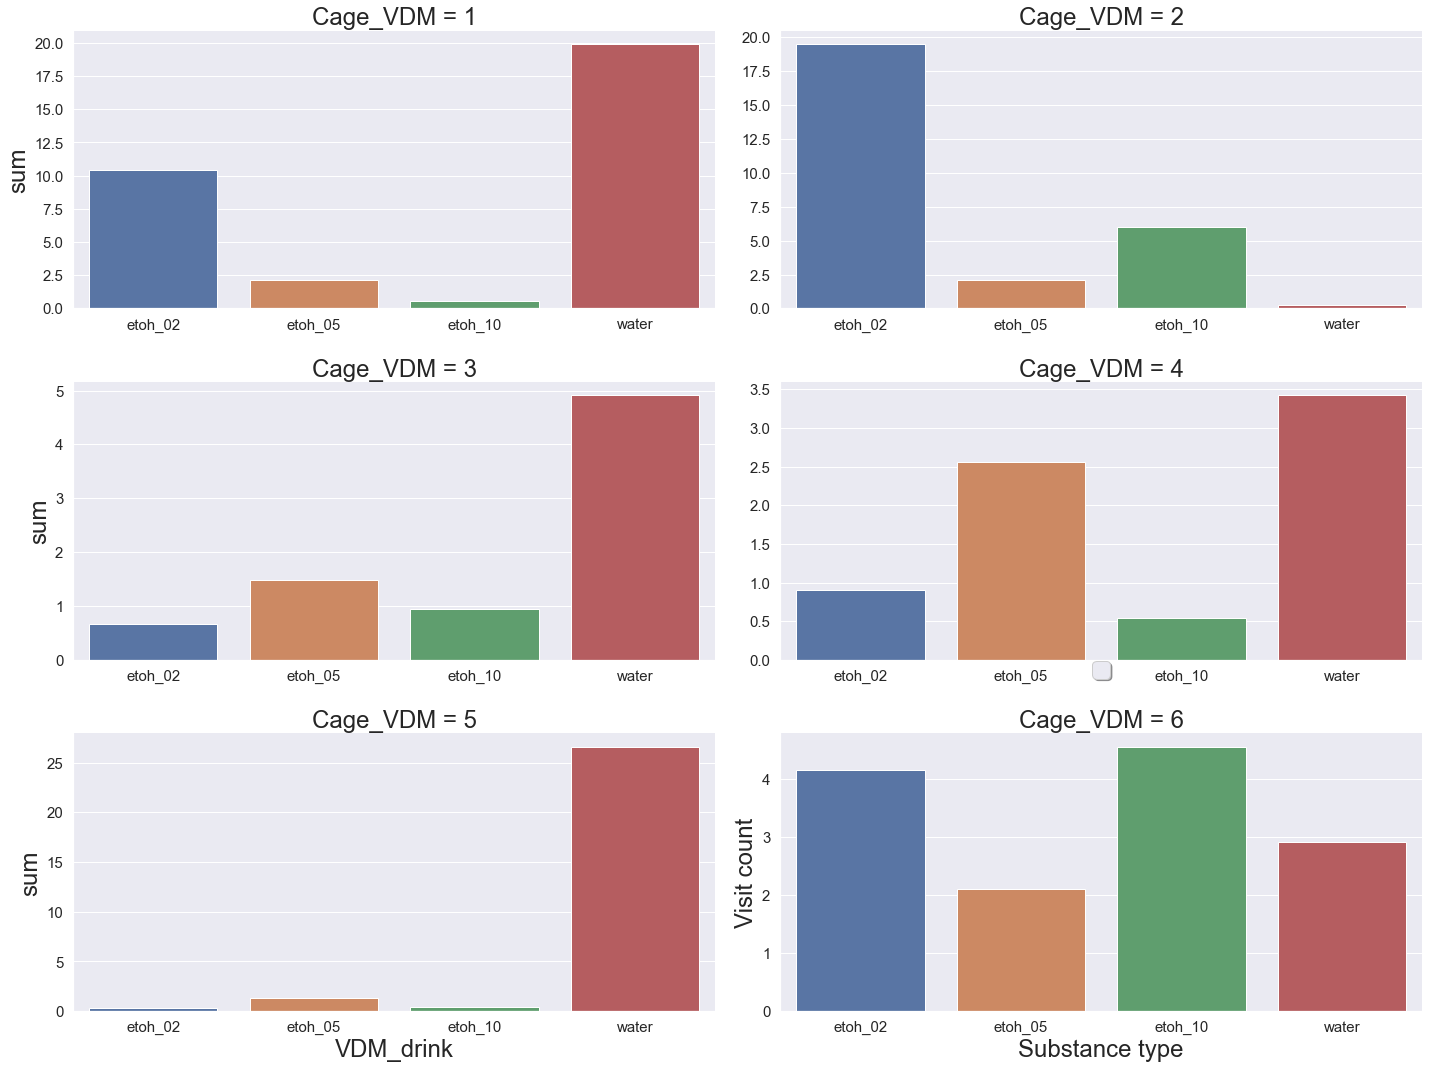

In [43]:
data_int = data_VDM_tidy_intake.groupby(['Cage_VDM', 'VDM_drink'])['value'].sum().reset_index(name='sum')

plt.figure(figsize=(10,5))
params = {'axes.labelsize': 30,
          'axes.titlesize': 30}
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
sns.catplot(data=data_int, x="VDM_drink", y='sum', kind='bar', height=5, aspect=2, 
            col='Cage_VDM', col_wrap=2, sharey=False, sharex=False)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=5, fancybox=True, shadow=True)
plt.xlabel('Substance type')
plt.ylabel('Visit count')
plt.show()

### Filter RFID data by VDM times

In [41]:
data_VDM_tidy_intake = data_VDM_tidy_intake.sort_values(['VDM_drink', 'VDM_datetime']).reset_index(drop=True)

print(data_VDM_tidy_intake.groupby('Cage_VDM')['VDM_drink'].value_counts())
print(data_VDM_tidy_intake.shape)
data_VDM_tidy_intake.head()

Cage_VDM  VDM_drink
1         water        784 
          etoh_02      494 
          etoh_05      100 
          etoh_10      27  
2         etoh_02      889 
          etoh_10      285 
          etoh_05      100 
          water        12  
3         water        228 
          etoh_10      45  
          etoh_02      32  
          etoh_05      27  
4         water        161 
          etoh_02      42  
          etoh_05      41  
          etoh_10      26  
5         water        1213
          etoh_05      42  
          etoh_10      20  
          etoh_02      17  
6         etoh_10      216 
          etoh_02      197 
          water        139 
          etoh_05      99  
Name: VDM_drink, dtype: int64
(5236, 15)


,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink
0,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 18:43:37,drink_4,0.021,2022-11-11 18:43:37,1.668192e+09,2022-11-11,11,18:43:37,18,43,37,dark_pm,etoh_02
1,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 19:51:51,drink_4,0.021,2022-11-11 19:51:51,1.668196e+09,2022-11-11,11,19:51:51,19,51,51,dark_pm,etoh_02
2,w_e05_e10_e2.5_MPc1_221111.csv,3,11/11/22 20:30:10,drink_4,0.021,2022-11-11 20:30:10,1.668199e+09,2022-11-11,11,20:30:10,20,30,10,dark_pm,etoh_02
3,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 21:05:50,drink_4,0.021,2022-11-11 21:05:50,1.668201e+09,2022-11-11,11,21:05:50,21,5,50,dark_pm,etoh_02
4,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 21:06:27,drink_4,0.021,2022-11-11 21:06:27,1.668201e+09,2022-11-11,11,21:06:27,21,6,27,dark_pm,etoh_02


In [44]:
data_RFID_final= data_RFID_final.sort_values(['unitLabel_drink', 'RFID_datetime_start']).reset_index(drop=True)
print(data_RFID_final['unitLabel_drink'].value_counts())
data_RFID_final.head()

etoh_10    13335
water      11631
etoh_02    11021
etoh_05    8816 
Name: unitLabel_drink, dtype: int64


,Round,Timepoint,Cage,IdRFID,Animal,Injury,Sex,Cage_N,unitLabel_drink,unitLabel,eventDuration,ld_cycle,ld_day,day,RFID_hour,RFID_min,RFID_second,RFID_datetime_start,RFID_datetime_end,RFID_time_start,RFID_time_end,RFID_min_count,RFID_sec_count,RFID_hour_count_running,RFID_min_count_running,RFID_sec_count_running,RFID_file,weight_pre,weight_post,weight_diff,notes
0,MPc1,1m,1,041ABFF7BC,2154,sham,male,4,etoh_02,Spyder1.20,2.290,dark,1,1,18,8,38,2022-11-11 18:08:38.854982399,2022-11-11 18:08:41.144982399,18:08:38,18:08:41,1088,65318,18,1088,65258,Idspyder-22.11.11.csv,30.7,NaN,NaN,NaN
1,MPc1,1m,1,041AC161AF,2155,sham,male,4,etoh_02,Spyder1.20,2.862,dark,1,1,18,9,12,2022-11-11 18:09:12.057984000,2022-11-11 18:09:14.919984000,18:09:12,18:09:14,1089,65352,18,1089,65292,Idspyder-22.11.11.csv,30.3,NaN,NaN,NaN
2,MPc1,1m,1,041AC165C3,2156,sham,male,4,etoh_02,Spyder1.20,4.378,dark,1,1,18,9,31,2022-11-11 18:09:31.833993600,2022-11-11 18:09:36.211993600,18:09:31,18:09:36,1089,65371,18,1089,65311,Idspyder-22.11.11.csv,29.6,NaN,NaN,NaN
3,MPc1,1m,1,041AC1685B,2157,sham,male,4,etoh_02,Spyder1.20,3.047,dark,1,1,18,9,45,2022-11-11 18:09:45.326044800,2022-11-11 18:09:48.373044800,18:09:45,18:09:48,1089,65385,18,1089,65325,Idspyder-22.11.11.csv,34.5,NaN,NaN,NaN
4,MPc1,1m,2,041AC16024,2207,blast,male,4,etoh_02,Spyder1.20,1.603,dark,1,1,18,10,43,2022-11-11 18:10:43.885977600,2022-11-11 18:10:45.488977600,18:10:43,18:10:45,1090,65443,18,1090,65383,Idspyder-22.11.11.csv,32.2,NaN,NaN,NaN


#### Match cage, unitLabel, and datetime

In [53]:
data_VDM_tidy_intake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5236 entries, 0 to 5235
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   VDM_file                 5236 non-null   object        
 1   Cage_VDM                 5236 non-null   object        
 2   VDM_Time                 5236 non-null   object        
 3   variable                 5236 non-null   object        
 4   value                    5236 non-null   float64       
 5   VDM_datetime             5236 non-null   datetime64[ns]
 6   VDM_timestamp            5236 non-null   float64       
 7   VDM_date                 5236 non-null   object        
 8   VDM_day                  5236 non-null   int64         
 9   VDM_time                 5236 non-null   object        
 10  VDM_hour                 5236 non-null   int64         
 11  VDM_min                  5236 non-null   int64         
 12  VDM_second               5236 non-

In [54]:
data_comb = data_VDM_tidy_intake

flavor_mapping = {'VDM_Fent05': 'fent_05',
                  'VDM_Fent20': 'fent_20',
                  'VDM_EtOH05': 'etoh_05',
                  'VDM_EtOH10': 'etoh_10',
                  'VDM_H20_1': 'water_1',
                  'VDM_H20_2': 'water_2'}

RFID_eventDuration = []
RFID_assign_id_pre = []
RFID_assign_var_pre = []
RFID_datetime_start_pre = []
RFID_datetime_end_pre = []

ld_cycle = []
ld_day = []

for index, row in data_VDM_tidy_intake.iterrows():
    if index%1000 == 0:
        print(index)
        
    #find RFID signal start time closest to VDM time before
    try:
        int_assign = data_RFID_final[(data_RFID_final['Cage'] == int(row['Cage_VDM'])) & #match cage
                               (data_RFID_final['unitLabel_drink'] == row['VDM_drink']) & #match tube
                               (data_RFID_final['RFID_datetime_start'] <= row['VDM_datetime']) #find closest datetime
                              ].sort_values(['RFID_datetime_start']).iloc[-1]

        RFID_eventDuration.append(int_assign['eventDuration'])
        RFID_assign_id_pre.append(int_assign['IdRFID'])
        RFID_assign_var_pre.append(int_assign['unitLabel_drink'])
        RFID_datetime_start_pre.append(int_assign['RFID_datetime_start'])
        RFID_datetime_end_pre.append(int_assign['RFID_datetime_end'])

        ld_cycle.append(int_assign['ld_cycle'])
        ld_day.append(int_assign['ld_day'])
        
    except:
        print(index, 'pre', row['Cage_VDM'])
        RFID_eventDuration.append(np.nan)
        RFID_assign_id_pre.append(np.nan)
        RFID_assign_var_pre.append(np.nan)
        RFID_datetime_start_pre.append(np.nan)
        RFID_datetime_end_pre.append(np.nan)

        ld_cycle.append(np.nan)
        ld_day.append(np.nan)
        
data_comb['RFID_eventDuration'] = RFID_eventDuration
data_comb['RFID_assign_id_pre'] = RFID_assign_id_pre
data_comb['RFID_assign_var_pre'] = RFID_assign_var_pre
data_comb['RFID_datetime_start_pre'] = RFID_datetime_start_pre
data_comb['RFID_datetime_end_pre'] = RFID_datetime_end_pre

data_comb['ld_cycle'] = ld_cycle
data_comb['ld_day'] = ld_day


print(data_comb.shape)
data_comb.head()

0
1000
2000
3000
4000
5000
(5236, 22)


,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day
0,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 18:43:37,drink_4,0.021,2022-11-11 18:43:37,1.668192e+09,2022-11-11,11,18:43:37,18,43,37,dark_pm,etoh_02,13.725,041AC1685B,etoh_02,2022-11-11 18:43:27.374966400,2022-11-11 18:43:41.099966400,dark,1
1,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 19:51:51,drink_4,0.021,2022-11-11 19:51:51,1.668196e+09,2022-11-11,11,19:51:51,19,51,51,dark_pm,etoh_02,8.770,041ABFF7BC,etoh_02,2022-11-11 19:51:44.387020800,2022-11-11 19:51:53.157020800,dark,1
2,w_e05_e10_e2.5_MPc1_221111.csv,3,11/11/22 20:30:10,drink_4,0.021,2022-11-11 20:30:10,1.668199e+09,2022-11-11,11,20:30:10,20,30,10,dark_pm,etoh_02,26.607,041AC035B7,etoh_02,2022-11-11 20:29:53.562969600,2022-11-11 20:30:20.169969600,dark,1
3,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 21:05:50,drink_4,0.021,2022-11-11 21:05:50,1.668201e+09,2022-11-11,11,21:05:50,21,5,50,dark_pm,etoh_02,53.519,041AC16B8D,etoh_02,2022-11-11 21:05:10.989974400,2022-11-11 21:06:04.508974400,dark,1
4,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 21:06:27,drink_4,0.021,2022-11-11 21:06:27,1.668201e+09,2022-11-11,11,21:06:27,21,6,27,dark_pm,etoh_02,25.343,041AC16B8D,etoh_02,2022-11-11 21:06:21.560976000,2022-11-11 21:06:46.903976000,dark,1


In [55]:
data_comb.isna().sum()

VDM_file                   0
Cage_VDM                   0
VDM_Time                   0
variable                   0
value                      0
VDM_datetime               0
VDM_timestamp              0
VDM_date                   0
VDM_day                    0
VDM_time                   0
VDM_hour                   0
VDM_min                    0
VDM_second                 0
ld_seg                     0
VDM_drink                  0
RFID_eventDuration         0
RFID_assign_id_pre         0
RFID_assign_var_pre        0
RFID_datetime_start_pre    0
RFID_datetime_end_pre      0
ld_cycle                   0
ld_day                     0
dtype: int64

#### Copmuter RFID/VDM time difference

In [56]:
def time_within(RFID_start, RFID_stop, VDM_time):
    
    if (VDM_time >= RFID_start) & (VDM_time <= RFID_stop):
        return 0
    
    elif (VDM_time >= RFID_start) & (VDM_time >= RFID_stop):
        time_within = VDM_time - RFID_stop
        time_within = time_within.total_seconds()
        return time_within
    
data_comb['VDM_RFID_timediff'] = data_comb.apply(lambda row: time_within(row['RFID_datetime_start_pre'], 
                                                                   row['RFID_datetime_end_pre'],
                                                                   row['VDM_datetime']), axis=1)

data_comb['VDM_RFID_timediff_bool'] = ['same' if x==0 else 'diff' for x in data_comb['VDM_RFID_timediff']]

data_comb.head()

,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,VDM_RFID_timediff,VDM_RFID_timediff_bool
0,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 18:43:37,drink_4,0.021,2022-11-11 18:43:37,1.668192e+09,2022-11-11,11,18:43:37,18,43,37,dark_pm,etoh_02,13.725,041AC1685B,etoh_02,2022-11-11 18:43:27.374966400,2022-11-11 18:43:41.099966400,dark,1,0.0,same
1,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 19:51:51,drink_4,0.021,2022-11-11 19:51:51,1.668196e+09,2022-11-11,11,19:51:51,19,51,51,dark_pm,etoh_02,8.770,041ABFF7BC,etoh_02,2022-11-11 19:51:44.387020800,2022-11-11 19:51:53.157020800,dark,1,0.0,same
2,w_e05_e10_e2.5_MPc1_221111.csv,3,11/11/22 20:30:10,drink_4,0.021,2022-11-11 20:30:10,1.668199e+09,2022-11-11,11,20:30:10,20,30,10,dark_pm,etoh_02,26.607,041AC035B7,etoh_02,2022-11-11 20:29:53.562969600,2022-11-11 20:30:20.169969600,dark,1,0.0,same
3,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 21:05:50,drink_4,0.021,2022-11-11 21:05:50,1.668201e+09,2022-11-11,11,21:05:50,21,5,50,dark_pm,etoh_02,53.519,041AC16B8D,etoh_02,2022-11-11 21:05:10.989974400,2022-11-11 21:06:04.508974400,dark,1,0.0,same
4,w_e05_e10_e2.5_MPc1_221111.csv,6,11/11/22 21:06:27,drink_4,0.021,2022-11-11 21:06:27,1.668201e+09,2022-11-11,11,21:06:27,21,6,27,dark_pm,etoh_02,25.343,041AC16B8D,etoh_02,2022-11-11 21:06:21.560976000,2022-11-11 21:06:46.903976000,dark,1,0.0,same


In [58]:
data_comb.groupby(['Cage_VDM', 'VDM_drink', ])['VDM_RFID_timediff_bool'].value_counts()

Cage_VDM  VDM_drink  VDM_RFID_timediff_bool
1         etoh_02    diff                      293 
                     same                      201 
          etoh_05    same                      57  
                     diff                      43  
          etoh_10    diff                      21  
                     same                      6   
          water      same                      640 
                     diff                      144 
2         etoh_02    same                      750 
                     diff                      139 
          etoh_05    same                      89  
                     diff                      11  
          etoh_10    same                      254 
                     diff                      31  
          water      diff                      6   
                     same                      6   
3         etoh_02    same                      21  
                     diff                      11  
          etoh_05   

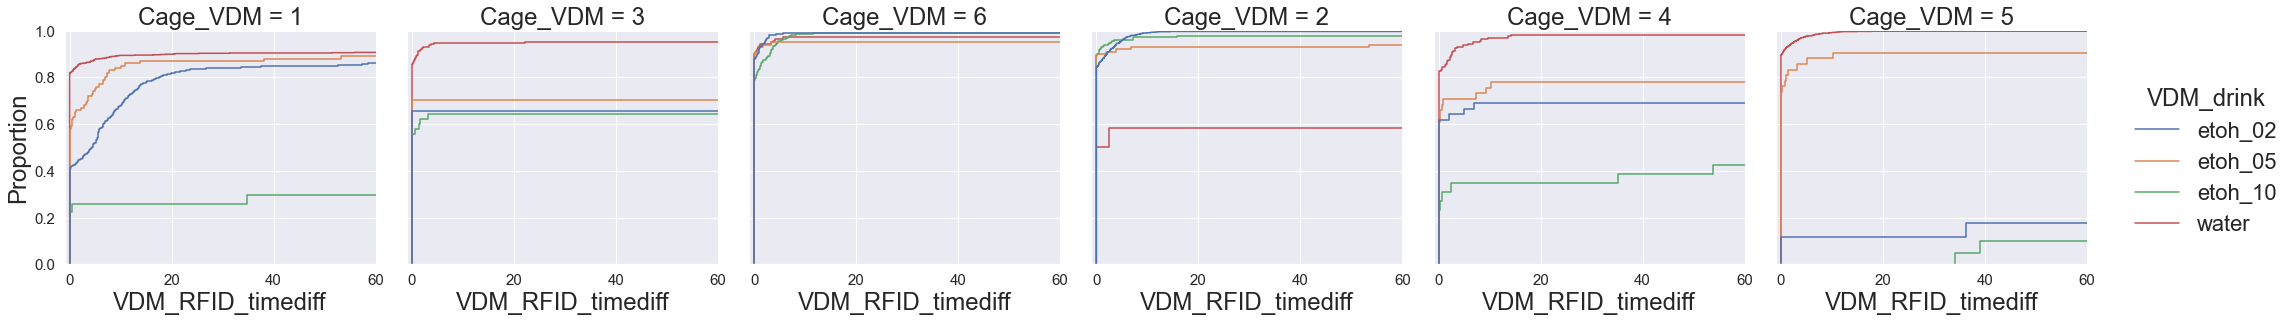

In [60]:
sns.displot(data=data_comb, x="VDM_RFID_timediff", kind="ecdf", hue='VDM_drink', col='Cage_VDM')

plt.xlim(-1, 60)
plt.show()

#### Add metadata

In [61]:
data_comb = meta_data.merge(data_comb.reset_index(), left_on='IdRFID', right_on='RFID_assign_id_pre', sort=False)

print(data_comb.shape)
data_comb.head()

(5236, 40)


,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,weight_pre,weight_post,weight_diff,notes,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,VDM_RFID_timediff,VDM_RFID_timediff_bool
0,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,NaN,NaN,NaN,1,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 19:51:51,drink_4,0.021,2022-11-11 19:51:51,1.668196e+09,2022-11-11,11,19:51:51,19,51,51,dark_pm,etoh_02,8.770,041ABFF7BC,etoh_02,2022-11-11 19:51:44.387020800,2022-11-11 19:51:53.157020800,dark,1,0.000000,same
1,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,NaN,NaN,NaN,5,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 21:15:56,drink_4,0.021,2022-11-11 21:15:56,1.668201e+09,2022-11-11,11,21:15:56,21,15,56,dark_pm,etoh_02,3.592,041ABFF7BC,etoh_02,2022-11-11 21:14:55.025030400,2022-11-11 21:14:58.617030400,dark,1,57.382969,diff
2,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,NaN,NaN,NaN,19,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 21:46:35,drink_4,0.021,2022-11-11 21:46:35,1.668203e+09,2022-11-11,11,21:46:35,21,46,35,dark_pm,etoh_02,0.075,041ABFF7BC,etoh_02,2022-11-11 21:46:33.672979200,2022-11-11 21:46:33.747979200,dark,1,1.252020,diff
3,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,NaN,NaN,NaN,20,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 21:46:38,drink_4,0.021,2022-11-11 21:46:38,1.668203e+09,2022-11-11,11,21:46:38,21,46,38,dark_pm,etoh_02,0.075,041ABFF7BC,etoh_02,2022-11-11 21:46:33.672979200,2022-11-11 21:46:33.747979200,dark,1,4.252020,diff
4,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,NaN,NaN,NaN,97,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 23:12:05,drink_4,0.021,2022-11-11 23:12:05,1.668208e+09,2022-11-11,11,23:12:05,23,12,5,dark_pm,etoh_02,0.075,041ABFF7BC,etoh_02,2022-11-11 23:12:00.096019200,2022-11-11 23:12:00.171019200,dark,1,4.828980,diff


#### Add day, hour, and min counts

In [62]:
#column of running day count
dat_map = dict(zip(data_comb['VDM_date'].sort_values().unique(), np.arange(1,len(data_comb['VDM_date'].unique())+1)))
data_comb['day_count'] = data_comb['VDM_date'].map(dat_map)

#column of running min and second count within each day
data_comb['min_count'] = (data_comb['VDM_hour']*60) + data_comb['VDM_min'] 
data_comb['sec_count'] = (data_comb['min_count']*60) + data_comb['VDM_second'] 

#column of running hour and minute count across all days
data_comb['hour_count_running'] = (data_comb['day_count']*24) + data_comb['VDM_hour'] - 24
data_comb['min_count_running'] = (data_comb['hour_count_running']*60) + data_comb['VDM_min'] 
data_comb['sec_count_running'] = (data_comb['min_count_running']*60) + data_comb['VDM_second'] - 60

#ld
#data_comb['LD'] = [x.split('_')[0] for x in data_comb['ld']]

print(data_comb.shape)
data_comb.head()

(5236, 46)


,Round,Build,Startdate,Timepoint,Cage,IdRFID,Animal,ARF_Cage,Injury,Sex,Cage_N,weight_pre,weight_post,weight_diff,notes,index,VDM_file,Cage_VDM,VDM_Time,variable,value,VDM_datetime,VDM_timestamp,VDM_date,VDM_day,VDM_time,VDM_hour,VDM_min,VDM_second,ld_seg,VDM_drink,RFID_eventDuration,RFID_assign_id_pre,RFID_assign_var_pre,RFID_datetime_start_pre,RFID_datetime_end_pre,ld_cycle,ld_day,VDM_RFID_timediff,VDM_RFID_timediff_bool,day_count,min_count,sec_count,hour_count_running,min_count_running,sec_count_running
0,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,NaN,NaN,NaN,1,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 19:51:51,drink_4,0.021,2022-11-11 19:51:51,1.668196e+09,2022-11-11,11,19:51:51,19,51,51,dark_pm,etoh_02,8.770,041ABFF7BC,etoh_02,2022-11-11 19:51:44.387020800,2022-11-11 19:51:53.157020800,dark,1,0.000000,same,1,1191,71511,19,1191,71451
1,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,NaN,NaN,NaN,5,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 21:15:56,drink_4,0.021,2022-11-11 21:15:56,1.668201e+09,2022-11-11,11,21:15:56,21,15,56,dark_pm,etoh_02,3.592,041ABFF7BC,etoh_02,2022-11-11 21:14:55.025030400,2022-11-11 21:14:58.617030400,dark,1,57.382969,diff,1,1275,76556,21,1275,76496
2,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,NaN,NaN,NaN,19,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 21:46:35,drink_4,0.021,2022-11-11 21:46:35,1.668203e+09,2022-11-11,11,21:46:35,21,46,35,dark_pm,etoh_02,0.075,041ABFF7BC,etoh_02,2022-11-11 21:46:33.672979200,2022-11-11 21:46:33.747979200,dark,1,1.252020,diff,1,1306,78395,21,1306,78335
3,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,NaN,NaN,NaN,20,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 21:46:38,drink_4,0.021,2022-11-11 21:46:38,1.668203e+09,2022-11-11,11,21:46:38,21,46,38,dark_pm,etoh_02,0.075,041ABFF7BC,etoh_02,2022-11-11 21:46:33.672979200,2022-11-11 21:46:33.747979200,dark,1,4.252020,diff,1,1306,78398,21,1306,78338
4,MPc1,4x6,22.11.11,1m,1,041ABFF7BC,2154,659,sham,male,4,30.7,NaN,NaN,NaN,97,w_e05_e10_e2.5_MPc1_221111.csv,1,11/11/22 23:12:05,drink_4,0.021,2022-11-11 23:12:05,1.668208e+09,2022-11-11,11,23:12:05,23,12,5,dark_pm,etoh_02,0.075,041ABFF7BC,etoh_02,2022-11-11 23:12:00.096019200,2022-11-11 23:12:00.171019200,dark,1,4.828980,diff,1,1392,83525,23,1392,83465


In [64]:
data_comb['substance'] = [x.split('_')[-1] for x in data_comb['VDM_drink']]

In [65]:
data_comb.to_csv('etoh_221111.csv')

In [70]:
data_int

,Cage_VDM,VDM_hour,sum
0,1,0,1.659
1,1,1,0.378
2,1,2,1.155
3,1,3,0.252
4,1,4,0.336
5,1,5,1.407
6,1,6,3.192
7,1,7,0.987
8,1,8,0.042
9,1,9,0.273


<Figure size 720x360 with 0 Axes>

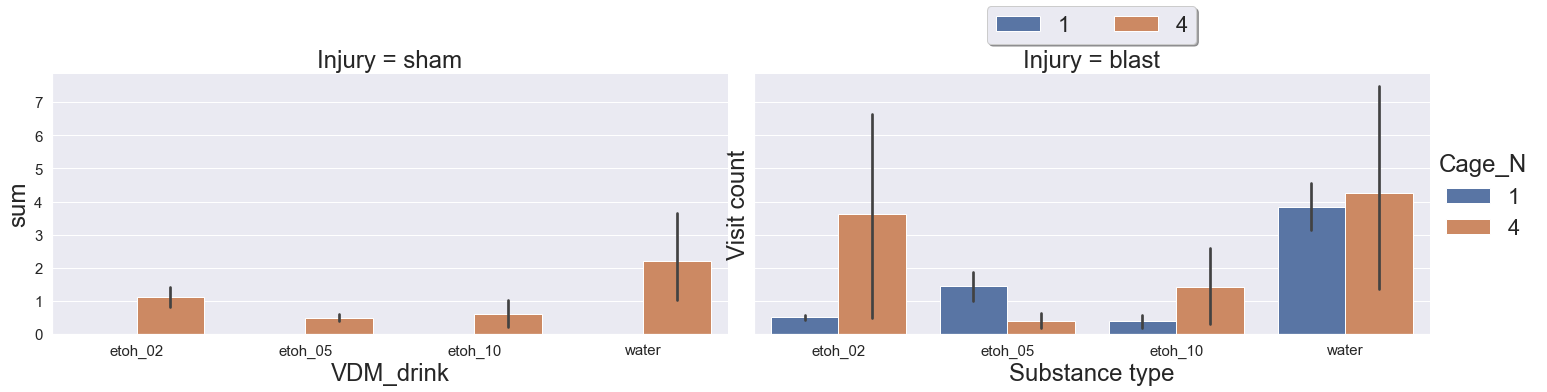

In [78]:
data_int = data_comb[data_comb['VDM_RFID_timediff']<3].groupby(['Animal', 'Injury', 'Cage_N', 'day_count', 'VDM_drink'])['value'].sum().reset_index(name='sum')

plt.figure(figsize=(10,5))
params = {'axes.labelsize': 30,
          'axes.titlesize': 30}
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
sns.catplot(data=data_int, x="VDM_drink", y='sum', kind='bar', height=5, aspect=2, hue='Cage_N', col='Injury'
            )
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          ncol=5, fancybox=True, shadow=True)
plt.xlabel('Substance type')
plt.ylabel('Visit count')
plt.show()